## Model-training

Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [3]:
# Read the csv file
df = pd.read_csv("../data/cleaned_properties.csv")

# Display the head
display(df.head())
df.shape
df.columns

,price,property_type,subproperty_type,region,province,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,1963.0,100.0,NaN,...,0,0.0,0,0,NaN,231.0,C,GAS,1,922.0
1,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,NaN,NaN,680.0,...,0,0.0,0,0,NaN,221.0,C,NaN,1,406.0
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,NaN,142.0,NaN,...,0,0.0,0,1,AS_NEW,NaN,NaN,GAS,0,NaN
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,2024.0,187.0,505.0,...,0,0.0,0,1,NaN,99.0,A,NaN,0,NaN
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,2022.0,169.0,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


Index(['price', 'property_type', 'subproperty_type', 'region', 'province',
       'locality', 'zip_code', 'construction_year', 'total_area_sqm',
       'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen',
       'fl_furnished', 'fl_open_fire', 'fl_terrace', 'terrace_sqm',
       'fl_garden', 'garden_sqm', 'fl_swimming_pool', 'fl_floodzone',
       'state_building', 'primary_energy_consumption_sqm', 'epc',
       'heating_type', 'fl_double_glazing', 'cadastral_income'],
      dtype='object')

## Filtering the data

In [4]:
# Filter the DataFrame for values APARTMENT and APARTMENT_BLOCK
df_house1 = df[df["property_type"] == "HOUSE"]
df_house2 = df_house1[df_house1['subproperty_type'] != 'APARTMENT_BLOCK']

df_house = df[(df["property_type"] == "HOUSE") & (df['subproperty_type'] != 'APARTMENT_BLOCK')]

df_house.head()
print(df_house.info())
print(df_house.shape)

df_house["subproperty_type"].unique()
print(df_house["locality"].unique())
df_house.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 37211 entries, 1 to 75506
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           37211 non-null  float64
 1   property_type                   37211 non-null  object 
 2   subproperty_type                37211 non-null  object 
 3   region                          37211 non-null  object 
 4   province                        37211 non-null  object 
 5   locality                        37211 non-null  object 
 6   zip_code                        37211 non-null  int64  
 7   construction_year               19969 non-null  float64
 8   total_area_sqm                  32360 non-null  float64
 9   surface_land_sqm                37211 non-null  float64
 10  nbr_frontages                   29563 non-null  float64
 11  nbr_bedrooms                    37211 non-null  float64
 12  equipped_kitchen                20753

construction_year                 17242
cadastral_income                  17168
equipped_kitchen                  16458
heating_type                      13276
state_building                    11529
primary_energy_consumption_sqm    10070
terrace_sqm                        8818
epc                                8721
nbr_frontages                      7648
total_area_sqm                     4851
garden_sqm                         2361
fl_double_glazing                     0
fl_floodzone                          0
fl_swimming_pool                      0
fl_garden                             0
price                                 0
fl_terrace                            0
fl_open_fire                          0
property_type                         0
nbr_bedrooms                          0
surface_land_sqm                      0
zip_code                              0
locality                              0
province                              0
region                                0


## Splitting the data

Creating variables X and y: define the target and the feature.

In [5]:
# Name X and y (specific columns=subset(houses))

X = df_house.drop(columns=['price', 'property_type', 'subproperty_type', 'zip_code', 'locality', 'construction_year', 'cadastral_income']).to_numpy()
y = df_house.price.to_numpy().reshape(-1,1)

In [6]:
# print chape
print("X shape: ", X.shape)
print("y-shape: ", y.shape)

X shape:  (37211, 20)
y-shape:  (37211, 1)


In [7]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Rescaling data

Convert categorical data to a numerical form.

Data to convert:  'region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type'

In [8]:
columns = df_house[['region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']]

# See unique values of multiple columns
for column in columns:
    multi_columns = df_house[column].unique()
    print(f"Unique values in column '{column}': {multi_columns}")

Unique values in column 'region': ['Flanders' 'Wallonia' 'Brussels-Capital']
Unique values in column 'province': ['East Flanders' 'Antwerp' 'Flemish Brabant' 'West Flanders' 'Hainaut'
 'Liège' 'Brussels' 'Luxembourg' 'Walloon Brabant' 'Namur' 'Limburg']
Unique values in column 'equipped_kitchen': [nan 'HYPER_EQUIPPED' 'INSTALLED' 'USA_UNINSTALLED' 'SEMI_EQUIPPED'
 'USA_HYPER_EQUIPPED' 'NOT_INSTALLED' 'USA_INSTALLED' 'USA_SEMI_EQUIPPED']
Unique values in column 'state_building': [nan 'AS_NEW' 'GOOD' 'TO_RENOVATE' 'JUST_RENOVATED' 'TO_BE_DONE_UP'
 'TO_RESTORE']
Unique values in column 'epc': ['C' 'A' nan 'D' 'E' 'B' 'G' 'F' 'A++' 'A+']
Unique values in column 'heating_type': [nan 'FUELOIL' 'GAS' 'PELLET' 'ELECTRIC' 'CARBON' 'WOOD' 'SOLAR']


class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')

## Encoding

Ohe on dataframe

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df_house contains the DataFrame and columns contains the relevant columns
columns_to_encode = ['region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']

# Extracting the columns to be encoded
data_to_encode = df_house[columns_to_encode]

# Creating the OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fitting and transforming the data
encoded_data = encoder.fit_transform(data_to_encode)
print(type(encoded_data))

# Converting the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=columns_to_encode))

# Concatenating the encoded DataFrame with the original DataFrame
df_house_encoded = pd.concat([df_house.drop(columns=columns_to_encode), encoded_df], axis=1)
display(df_house_encoded.columns)


<class 'numpy.ndarray'>


Index(['price', 'property_type', 'subproperty_type', 'locality', 'zip_code',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'fl_furnished', 'fl_open_fire',
       'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'primary_energy_consumption_sqm',
       'fl_double_glazing', 'cadastral_income', 'region_Brussels-Capital',
       'region_Flanders', 'region_Wallonia', 'province_Antwerp',
       'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Limburg',
       'province_Liège', 'province_Luxembourg', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders',
       'equipped_kitchen_HYPER_EQUIPPED', 'equipped_kitchen_INSTALLED',
       'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED',
       'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED',
       'equipped_kitch

In [10]:
df_house.shape


(37211, 27)

In [11]:
print(type(df_house_encoded))
display(df_house_encoded.info())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 56031 entries, 1 to 37210
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                37211 non-null  float64
 1   property_type                        37211 non-null  object 
 2   subproperty_type                     37211 non-null  object 
 3   locality                             37211 non-null  object 
 4   zip_code                             37211 non-null  float64
 5   construction_year                    19969 non-null  float64
 6   total_area_sqm                       32360 non-null  float64
 7   surface_land_sqm                     37211 non-null  float64
 8   nbr_frontages                        29563 non-null  float64
 9   nbr_bedrooms                         37211 non-null  float64
 10  fl_furnished                         37211 non-null  float64


None

## Imputing with mean

Features with NaN to imputate with mean
- surface_land_sqm                      36254
- primary_energy_consumption_sqm        26564
- nbr_frontages                         26344
- terrace_sqm                           13140
- total_area_sqm                        7615
- garden_sqm                            2939

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming X_train is your NumPy array and columns_to_impute contains the relevant column names
columns_to_impute = ['surface_land_sqm', 'primary_energy_consumption_sqm', 'nbr_frontages', 'terrace_sqm', 'total_area_sqm', 'garden_sqm']
columns = df_house.drop(columns=['price', 'property_type', 'subproperty_type', 'zip_code', 'locality', 'construction_year', 'cadastral_income']).columns 

# Convert X_train to a DataFrame with appropriate column names
X_train_df = pd.DataFrame(X_train, columns=columns)

# Find the indices of the columns to impute
column_indices = [list(X_train_df.columns).index(col) for col in columns_to_impute]
print(column_indices)

# Create SimpleImputer object
imp_mean = SimpleImputer(strategy='mean')

# Fit the imputer to the selected columns in X_train
imp_mean.fit(X_train[:, column_indices])

# Transform the selected columns in X_train with the fitted imputer
X_train_imputed = X_train.copy()  # Create a copy of X_train
X_train_imputed[:, column_indices] = imp_mean.transform(X_train[:, column_indices])

# X_train_imputed now contains X_train with missing values imputed using the mean strategy for the selected columns

X_train_imputed.shape


[3, 16, 4, 10, 2, 12]


(29768, 20)

Ohe on np.array with imputer

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train_imputed is your numpy array and columns_to_encode is a list of column names to encode
columns_to_encode = ['region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']
columns = df_house.drop(columns=['price', 'property_type', 'subproperty_type', 'zip_code', 'locality', 'construction_year', 'cadastral_income']).columns
df2 = df_house.drop(columns=['price', 'property_type', 'subproperty_type', 'zip_code', 'locality', 'construction_year', 'cadastral_income'])
cols = df2.columns.to_list
print(cols)

# Convert X_train_imputed to a DataFrame with appropriate column names
X_train_df = pd.DataFrame(X_train_imputed, columns=columns)
print(X_train_df.shape)


# Handling NaN values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # You can choose a strategy that fits your data
data_imputed = pd.DataFrame(imputer.fit_transform(X_train_df), columns=X_train_df.columns)
print(data_imputed.shape)

# Creating the OneHotEncoder object
encoder = OneHotEncoder()

# Fitting and transforming the data
encoded_data = encoder.fit_transform(data_imputed)

# Converting the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray())

# Selecting non-encode columns from the original X_train_imputed array
non_encoded_columns = np.delete(X_train_imputed, np.where(np.isin(X_train_df.columns, columns_to_encode)), axis=1)
print(non_encoded_columns.shape)
print(type(non_encoded_columns))

# Concatenating the non-encoded columns with the encoded array
X_train_encoded = np.concatenate([non_encoded_columns, encoded_array], axis=1)

X_train_encoded.shape

<bound method IndexOpsMixin.tolist of Index(['region', 'province', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing'],
      dtype='object')>
(29768, 20)
(29768, 20)
(29768, 14)
<class 'numpy.ndarray'>


NameError: name 'encoded_array' is not defined

In [ ]:
X_train_df.isna().sum().sort_values(ascending=False)

## Relationship between variables

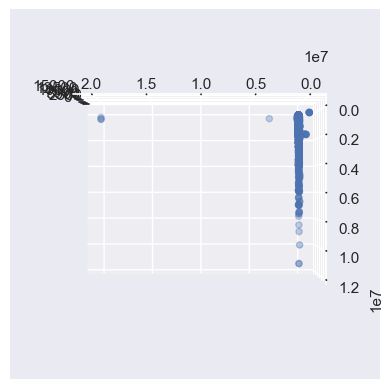

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_house['total_area_sqm']
y = df_house['primary_energy_consumption_sqm']
z = df_house['price']

ax.view_init(180, 180)
ax.scatter(x, y, z)

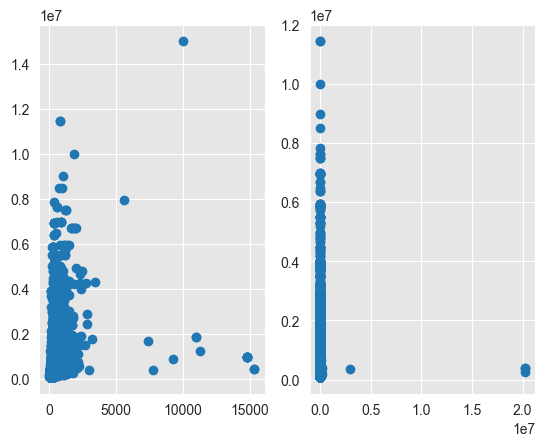

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)
#plt.tight_layout()
axes[0].scatter(df_house['total_area_sqm'], df_house['price'])
axes[1].scatter(df_house['primary_energy_consumption_sqm'],df_house['price'])
plt.show()

c:\Users\fabie\OneDrive\Documenten\BeCodeGhent\Projects\immo-eliza-ml\.venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


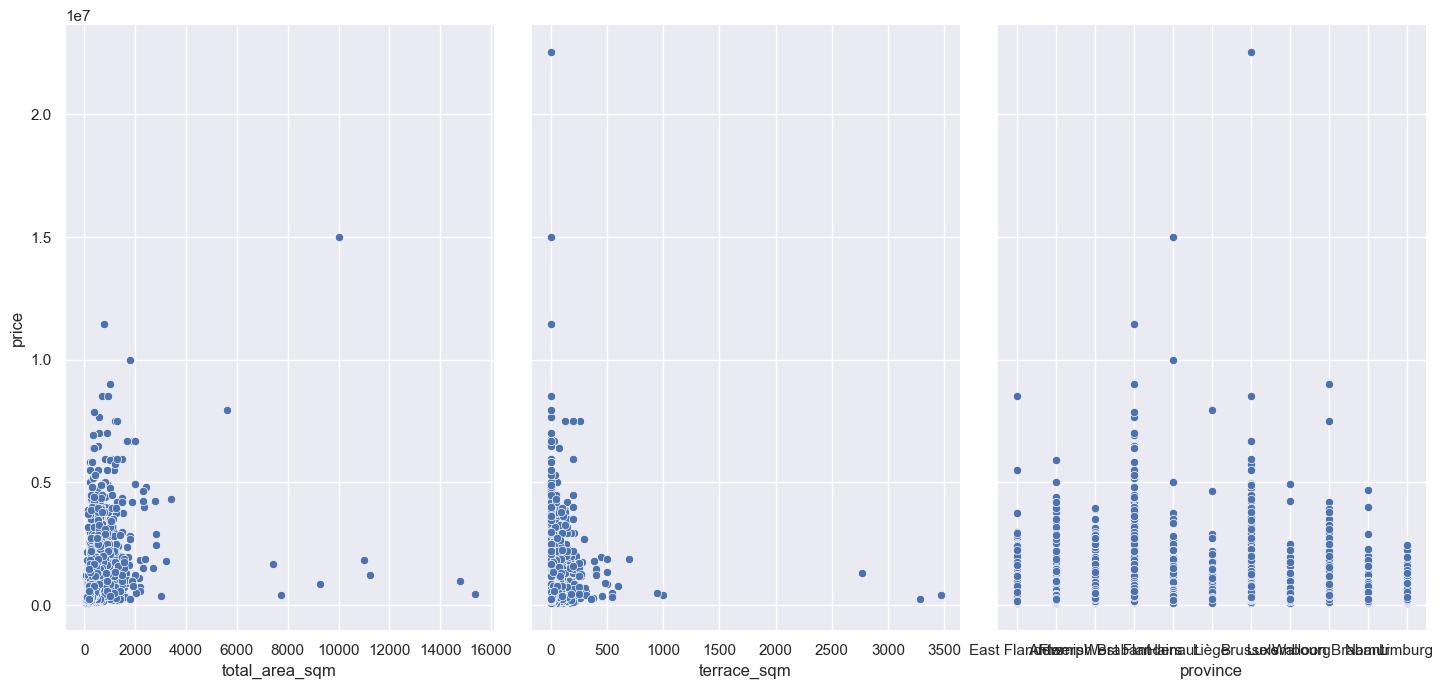

In [19]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_house, x_vars=['total_area_sqm','terrace_sqm','province'], y_vars='price', size=7, aspect=0.7)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

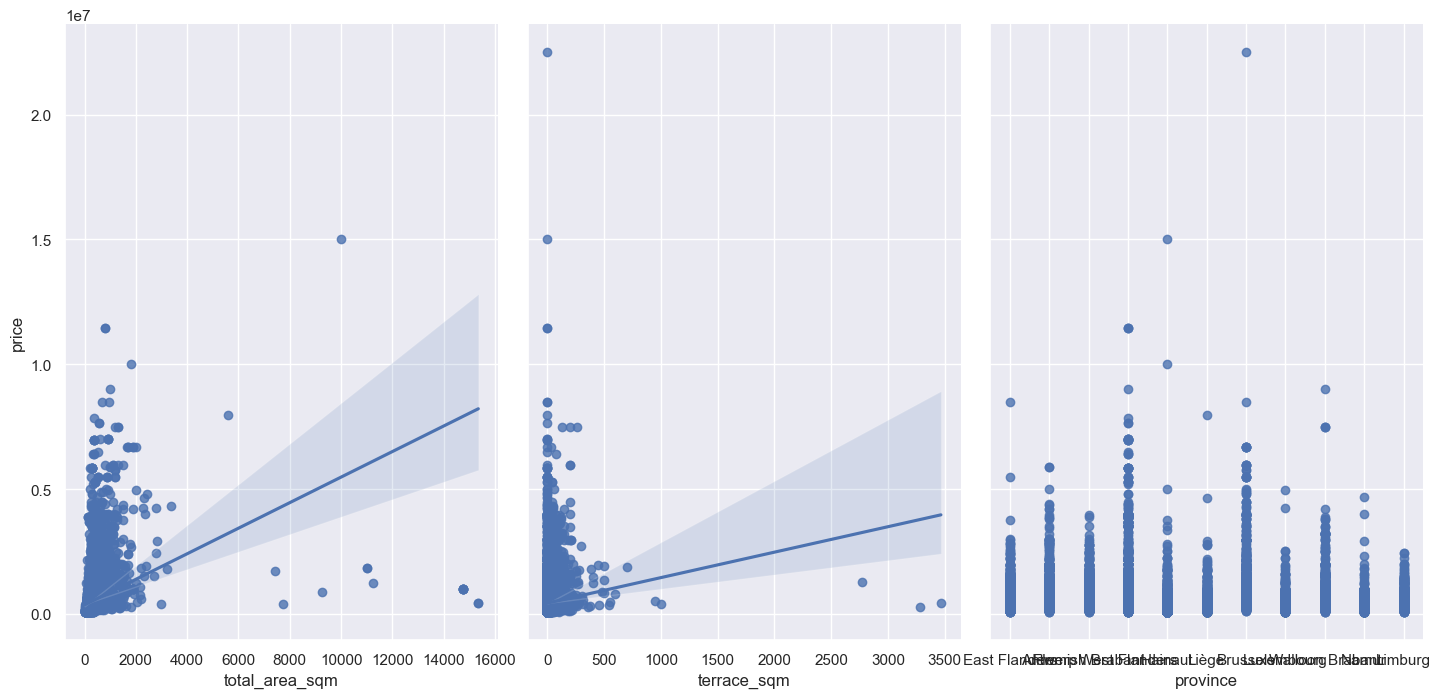

In [22]:
sns.pairplot(df_house, x_vars=['total_area_sqm','terrace_sqm','province'], y_vars='price', height=7, aspect=0.7, kind='reg')

Showing correlation coefficients.

In [14]:
df_house.select_dtypes(exclude='object').corr().T

,price,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income
price,1.000000,-0.098221,0.029592,0.318535,0.154763,0.187879,0.331446,0.045312,0.001797,0.058365,0.095072,-0.002612,0.106019,0.248913,-0.057939,-0.002683,0.022692,0.001704
zip_code,-0.098221,1.000000,0.116432,-0.037899,-0.005519,-0.013769,-0.065365,-0.001756,-0.126402,-0.137502,-0.074105,-0.175114,-0.032819,-0.053362,-0.018038,0.005285,-0.041531,0.002570
construction_year,0.029592,0.116432,1.000000,-0.087749,-0.054917,0.181063,-0.058862,-0.031072,-0.037461,0.016978,-0.012029,-0.034522,-0.040721,0.033492,-0.006225,0.002741,0.033104,-0.000271
total_area_sqm,0.318535,-0.037899,-0.087749,1.000000,0.077557,0.087000,0.286098,0.029507,0.025936,0.008136,0.056349,-0.014852,0.054615,0.107691,0.008939,-0.000556,-0.016861,0.000079
surface_land_sqm,0.154763,-0.005519,-0.054917,0.077557,1.000000,0.090224,0.080343,0.008739,0.027389,-0.001465,0.020048,-0.004459,0.194023,0.054093,0.006422,-0.000584,-0.002829,0.000174
nbr_frontages,0.187879,-0.013769,0.181063,0.087000,0.090224,1.000000,0.078713,0.026591,0.061770,0.007832,0.064244,0.004162,0.096879,0.163143,-0.018746,0.008298,0.001732,0.016206
nbr_bedrooms,0.331446,-0.065365,-0.058862,0.286098,0.080343,0.078713,1.000000,0.053002,0.034945,0.059580,0.052320,0.031627,0.065170,0.097298,-0.002206,0.001386,0.016365,-0.002067
fl_furnished,0.045312,-0.001756,-0.031072,0.029507,0.008739,0.026591,0.053002,1.000000,0.016946,0.051558,0.043060,0.025317,0.012399,0.037296,-0.004268,-0.001156,0.023127,0.002314
fl_open_fire,0.001797,-0.126402,-0.037461,0.025936,0.027389,0.061770,0.034945,0.016946,1.000000,0.053574,0.031868,0.203993,0.035254,0.029246,0.032812,-0.006116,0.140841,0.011769
fl_terrace,0.058365,-0.137502,0.016978,0.008136,-0.001465,0.007832,0.059580,0.051558,0.053574,1.000000,0.370863,0.259950,0.062310,0.111341,-0.051181,-0.004992,0.155873,-0.005747


<Figure size 1200x800 with 0 Axes>

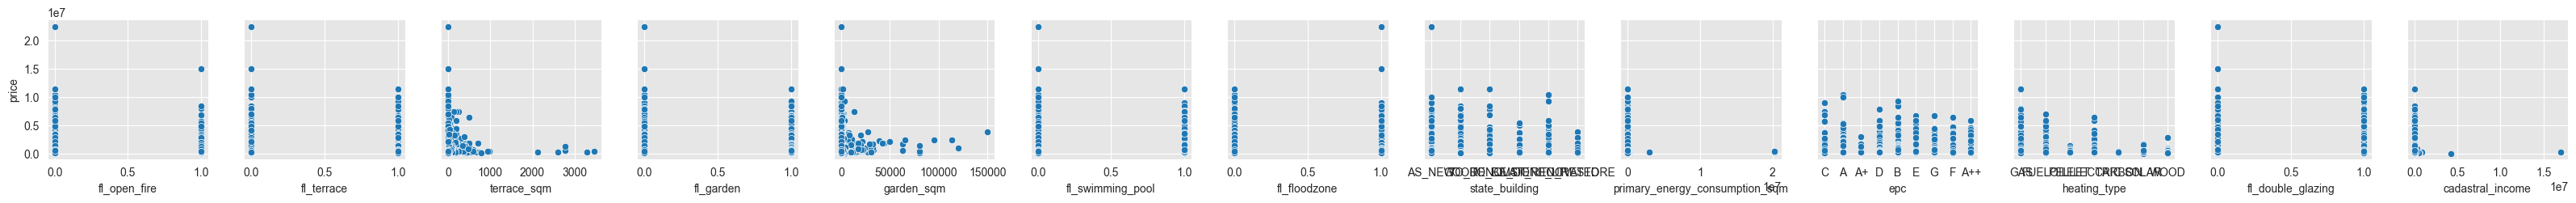

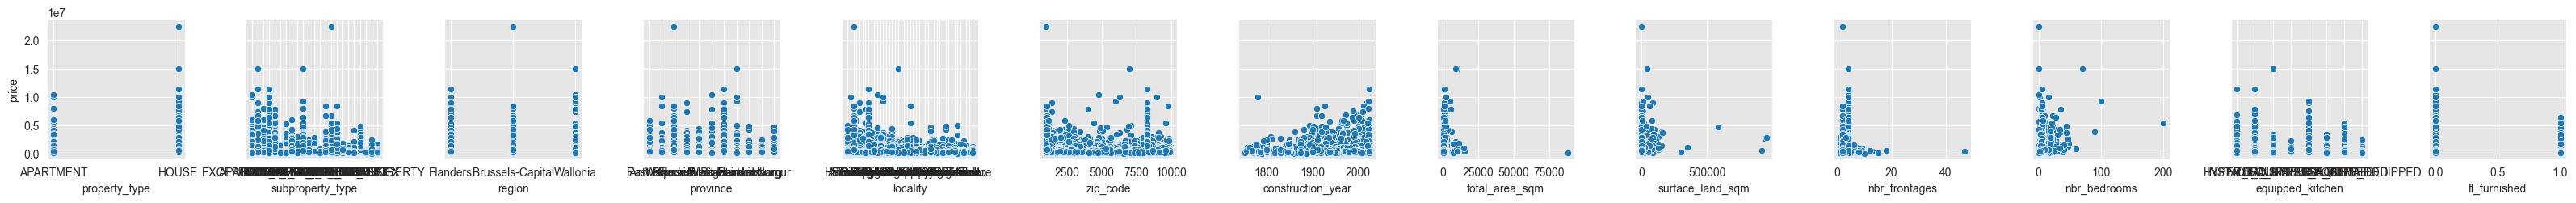

In [15]:
# Make two figures so it is better visualized

plt.figure(figsize=(12,8))

X = df_house.drop(columns=["price"])
y = df["price"]

half = len(X.columns)//2


fig1 = sns.pairplot(df, x_vars=X.columns[half:], y_vars='price')
fig2 = sns.pairplot(df, x_vars=X.columns[:half], y_vars='price')




## Linear Regression model

In [ ]:
# Name X and y (specific columns=subset(houses))

X = df_house["total_area_sqm"].to_numpy().reshape(-1,1)
y = df_house["price"].to_numpy().reshape(-1,1)

# Split the data into training and test data
X_train1, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(type(X_train1))

In [ ]:
import numpy as np
#r = np.corrcoef(X, y)[0,1]
#display(r)
#print(f"Correlation Coefficient between 'YearsExperience' and 'Salary': {r}")

Load and fit the model

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data
imputer.fit(X_train1)

# Transform the data, replacing missing values
X_train_imputed = imputer.transform(X_train1)

print(X_train_imputed.shape)


In [ ]:

# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create regressor and instantiate LinearRegression class
reg = LinearRegression()
print(type(reg))

# Train the model with X_train and  y_train
reg.fit(X_train_imputed, y_train)

In [ ]:
# Display score of training model
score = reg.score(X_train_imputed, y_train)
print(score*100)

In [ ]:
# Use the model on the test dataset
reg.fit(X_test, y_test)

In [ ]:
# Display score of test model
score = reg.score(X_test, y_test)
print(score*100)

In [ ]:
# Function to flatten 2D lists so it can be used by plotly
def flatten(l):
    return [item for sublist in l for item in sublist]

# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)

# Flatten the prediction and expected lists
predicted = flatten(lin_reg.predict(X_test))
expected = flatten(y_test.values)

two functions:

train : has as input X train y train output the model already trained

evaluate: Takes (the trained model, X test and y test,) and outputs the score